<a href="https://colab.research.google.com/github/AL-SayedHamdy/The-Sparks-Foundation/blob/main/Exploratory_Data_Analysis_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Al-Sayed Hamdy**

# **Importing libraries**

In [3]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings ('ignore')
sns.set(style="darkgrid") 
%matplotlib inline

# **Data understanding**

In [4]:
df = pd.read_csv('/content/SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
len(df)

9994

In [8]:
df.shape

(9994, 13)

In [9]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [10]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Now we are sure there's no missing values in our data**

# **Data visualization, EDA and analysis**

**Let's see some more details about our dataset, in general**

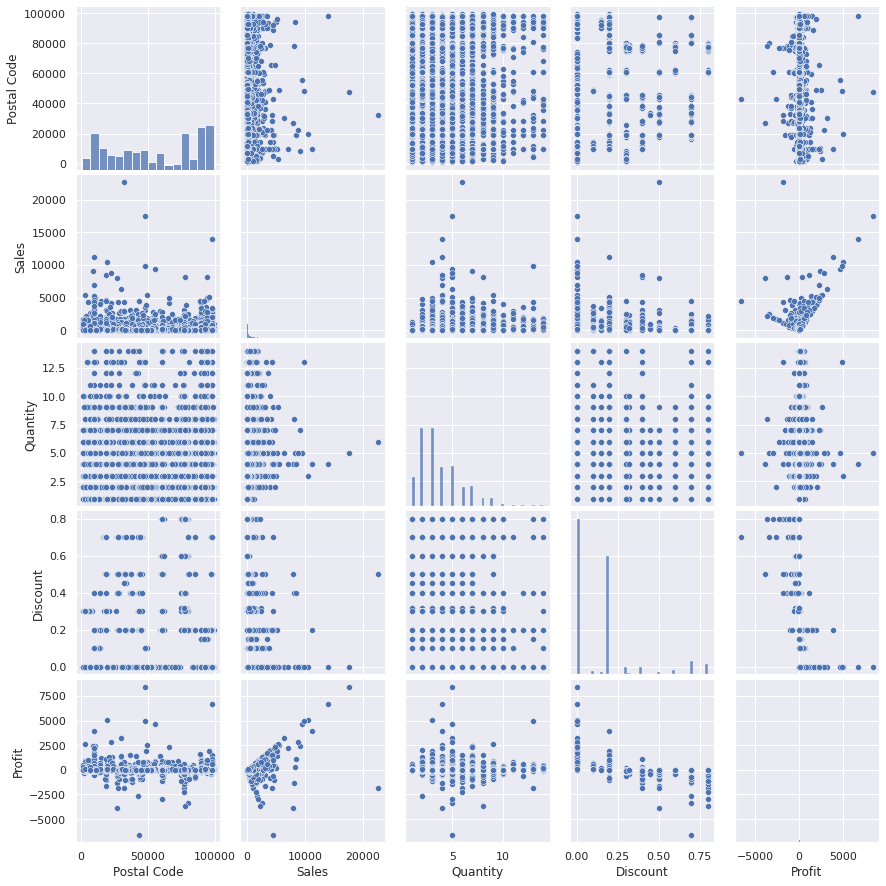

In [11]:
sns.pairplot(df)

**Now we need to see the connection between the Ship Mode and the profits**

In [ ]:
A = pd.DataFrame(df.groupby(['Ship Mode'])['Profit'].sum()).reset_index()
A

,Ship Mode,Profit
0,First Class,48969.8399
1,Same Day,15891.7589
2,Second Class,57446.6354
3,Standard Class,164088.7875


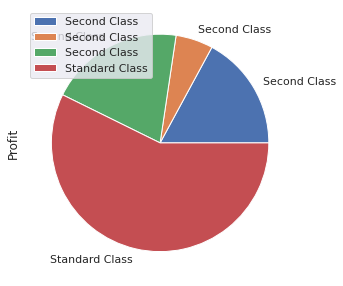

In [ ]:
A.plot.pie(y='Profit', labels=df['Ship Mode'], figsize=(10,5))

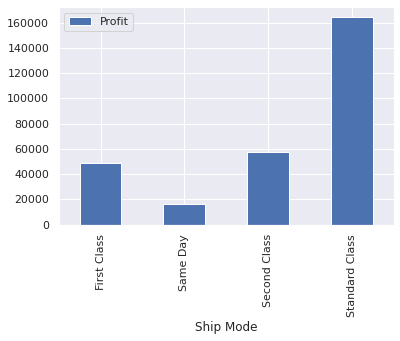

In [ ]:
A.plot(kind='bar', x="Ship Mode", y="Profit")

**Now we realize that the standard class is the highest profit among them, and the first call is the one with the minimum profit**

In [ ]:
#Checking how many Segments in our dataset
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

**Let's see the profits among the segments**

In [ ]:
B = pd.DataFrame(df.groupby(['Segment'])['Profit'].sum()).reset_index()
B

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


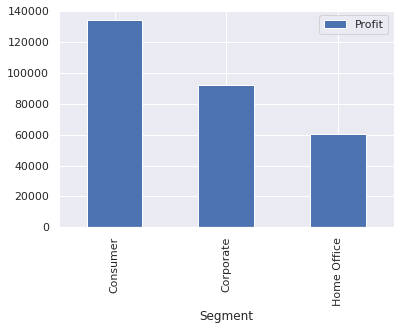

In [ ]:
B.plot(kind='bar', x='Segment')

**We can see that, the consumers is the one that has the maximum profits among the three of them, and the home office is the minimum profit.**

In [ ]:
#We need to know how many countries in our dataset
df['Country'].unique()

array(['United States'], dtype=object)

**We just have United States as the only country in our data set so we will ignore the analysis of the country and the profit**

In [ ]:
#How many categories we have
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

**Now we need to compare between them too.**

In [ ]:
C = pd.DataFrame(df.groupby(['Category'])['Profit'].sum()).reset_index()
C

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


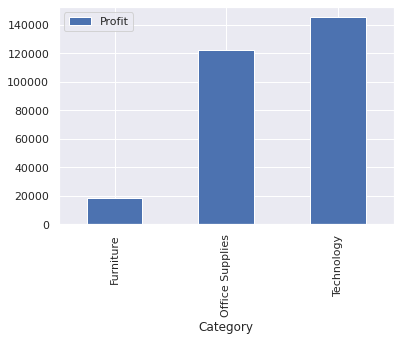

In [ ]:
C.plot(kind='bar', x='Category')

**To figure out that the Technology has the maximum profits and the Furniture has the minimum**

In [ ]:
df['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

**Now we will make a simple comprehension between the profits amon the cities**

In [ ]:
#Now we will see the most 10 ceties with high profits
max_profit = pd.DataFrame(df.groupby(["City"])['Profit'].sum()).reset_index().sort_values('Profit', ascending=False).head(10)
max_profit

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


In [ ]:
#And there are the low cities profits
min_profit = pd.DataFrame(df.groupby(["City"])['Profit'].sum()).reset_index().sort_values('Profit', ascending=False).tail(10)
min_profit

,City,Profit
216,Jacksonville,-2323.8350
24,Aurora,-2691.7386
375,Phoenix,-2790.8832
109,Dallas,-2846.5257
60,Burlington,-3622.8772
80,Chicago,-6654.5688
241,Lancaster,-7239.0684
434,San Antonio,-7299.0502
207,Houston,-10153.5485
374,Philadelphia,-13837.7674


# **Thanks for reading**
I think now we can understand the whole dataset and we can do as many edits as we need. We did a complete analysis and comprehension of all the features that can affect the profit in all ways.
I hope this notebook was useful.